## **Data Exploration for Job Market Analysis**

In a rapidly evolving job landscape, understanding the trends and dynamics of the job market is crucial for both employers and job seekers. This project focuses on exploring a dataset related to job listings, which includes features such as job titles, salaries, experience levels, required skills, company locations, and job descriptions.

Before building predictive models or drawing strategic conclusions, we need to explore and understand the data. This process—known as Exploratory Data Analysis (EDA)—helps us uncover valuable insights, detect patterns, and identify potential issues such as missing values, outliers, or skewed distributions.

In this notebook, we will:

Summarize key statistics across job-related features (e.g., salary distributions, experience levels)

Visualize trends such as salary by job title or company location

Examine relationships between variables (e.g., number of skills vs salary or job description length)

Detect potential data quality issues

Reveal insights that can inform hiring trends, skill demand, and compensation benchmarks

*   Summarize key statistics across job-related features (e.g., salary distributions, experience levels)
*   Visualize trends such as salary by job title or company location
*  Examine relationships between variables (e.g., number of skills vs salary or job description length)
*  Detect potential data quality issues
*  Reveal insights that can inform hiring trends, skill demand, and compensation benchmarks

Source of the dataset:
https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025

By the end of this exploration, we'll have a strong foundational understanding of the job market data—and a clear direction for modeling, visualization dashboards, or further analysis.

Let’s dive into the data and see what the job market is really saying. 💼📈


# **🧰 Step 1: Library Imports**

To begin our analysis, we need to import a set of powerful Python libraries. Each one serves a specific purpose in helping us clean, explore, and visualize the data effectively:





*   pandas: data manipulation and analysis. It allows us to load, explore, filter, and transform datasets using DataFrames
*   Matplotlib.pyplot: create static, interactive, and animated visualizations.
*   Seaborn:  statistical graphics such as heatmaps, bar plots, and violin plots.
*   WordCloud: generate word cloud visualizations
*   Counter (from collections module): helps count the frequency of elements in a list
*   Datetime: module that works with data and time, useful for parsing dates, calculating durations, or extracting year/month info.
*   re (Regular expression): Helps search, match, and manipulate text using patterns.
*   Plotly express: A high-level interface for creating interactive plots and dashboards.
*   Pycountry: Provides ISO information for countries, including names, codes, and subdivisions.


✅ Make sure that the imported libraries are downloaded, if not add
!pip install pandas matplotlib seaborn ....









In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from datetime import datetime
import re
import plotly.express as px
import pycountry


# **Step 2: Uploading CSV file**

1. Load the dataset using pd.read_csv('file path')
2. Data overview:kmowimg shape, type, and if there is null value.

In [ ]:
# Load the dataset by the same file path upload in the files on this notebook
df = pd.read_csv('/content/ai_job_dataset.csv')

In [ ]:
# dataset overview
print("Dataset shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset shape: (15000, 19)

Column Types:
 job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            float64
company_name               object
dtype: object

Missing Values:
 job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0

# **Step 3: Data Exploration Applied to Your Dataset**

# 1. **Required skills** (Primary Feature)

In this stage, we want to:
*   Tokenize and extract keyords from the required_skills column.
*   Count Frequency of each skill.
*   Group skills by job titles or industries

***The expected output:***
1.   cleaned & normalized skill list
2.   bar chart top 20 skills
3. Word Cloud showing skill importance
4. Trend line graph, skill mention change overtime







/tmp/ipython-input-6-3934042356.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skills), palette='plasma')


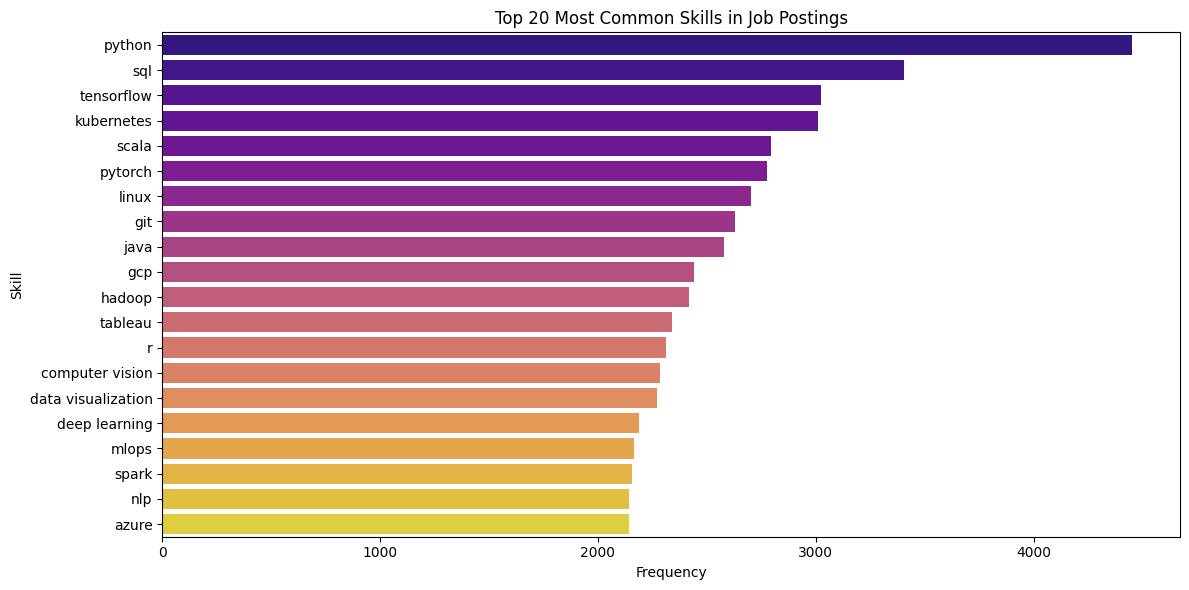

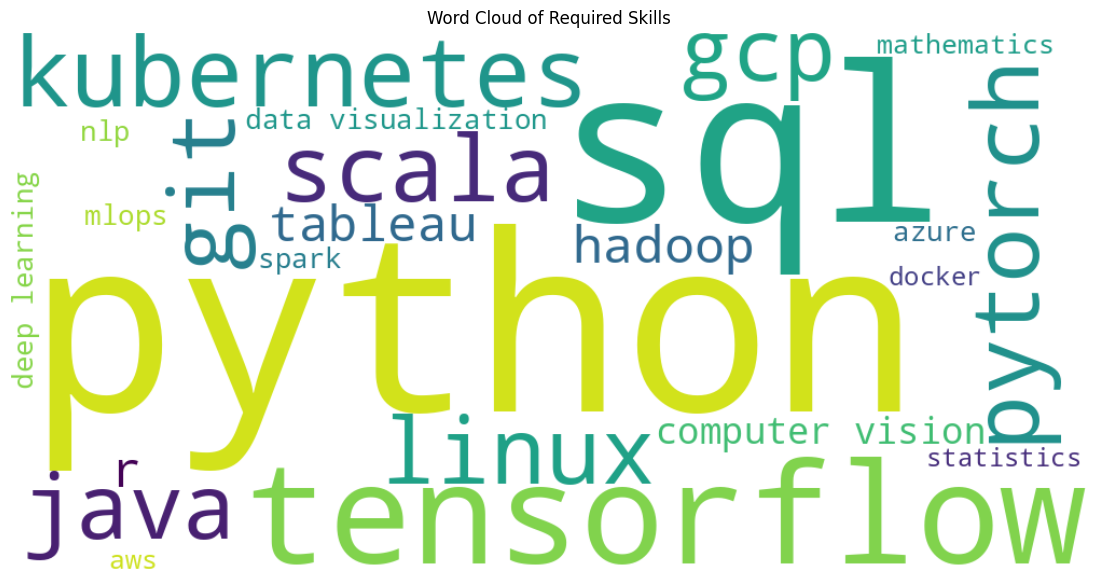

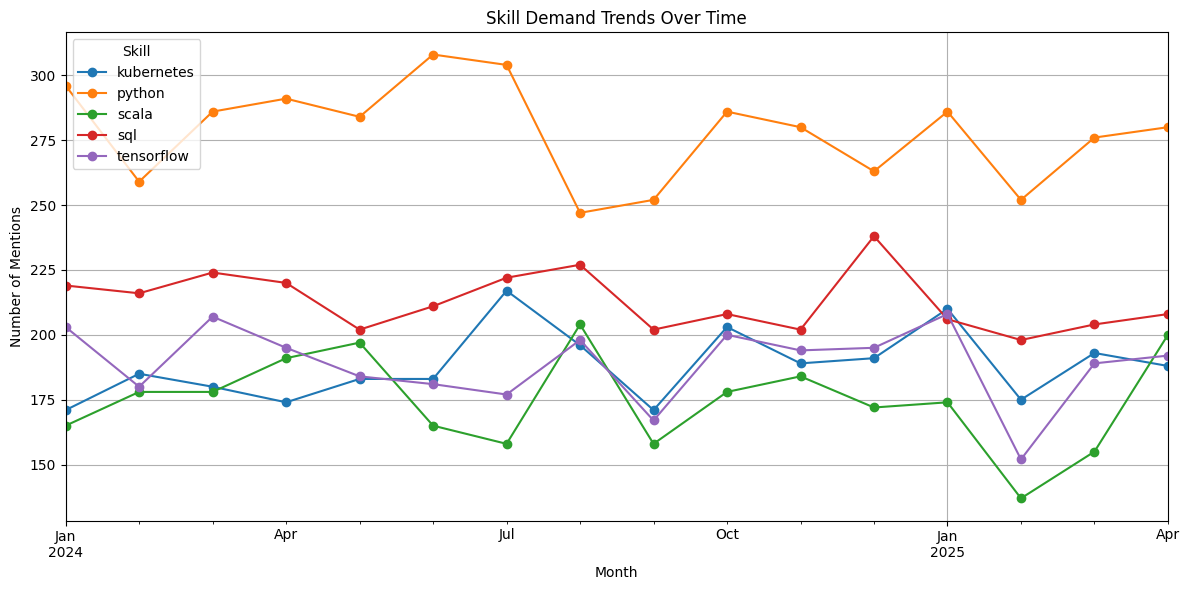

In [ ]:
# ----------------------------
# 1. Clean & Tokenize required_skills
# ----------------------------

# Fill NaNs
df['required_skills'] = df['required_skills'].fillna('')

# Use regex to clean each skill list and split into tokens
def extract_skills(skill_str):
    # Remove unwanted characters, normalize spacing
    cleaned = re.sub(r'[^\w,\s]', '', skill_str)  # Remove special chars
    return [skill.strip().lower() for skill in cleaned.split(',') if skill.strip()]

df['skill_list'] = df['required_skills'].apply(extract_skills)

# ----------------------------
# 2. Count Frequency of All Skills
# ----------------------------
all_skills = [skill for skills in df['skill_list'] for skill in skills]
skill_freq = Counter(all_skills)
top_skills = skill_freq.most_common(20)

# ----------------------------
# 3. Bar Chart: Top 20 Most Common Skills
# ----------------------------
skills, counts = zip(*top_skills)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(skills), palette='plasma')
plt.title("Top 20 Most Common Skills in Job Postings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

# ----------------------------
# 4. Word Cloud of All Skills
# ----------------------------
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(skill_freq)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Required Skills")
plt.show()

# ----------------------------
# 5. Skill Trends Over Time (Optional if you have multiple months)
# ----------------------------

# Convert posting_date to datetime if not already
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['month'] = df['posting_date'].dt.to_period('M')

# Explode skills by row
df_exploded = df.explode('skill_list')

# Group and count skills per month
monthly_skill_counts = df_exploded.groupby(['month', 'skill_list']).size().reset_index(name='count')

# Select a few top skills to visualize trend (e.g., top 5 from previous list)
top_5_skills = [skill for skill, _ in top_skills[:5]]
trend_data = monthly_skill_counts[monthly_skill_counts['skill_list'].isin(top_5_skills)]

# Pivot for trend plotting
trend_pivot = trend_data.pivot(index='month', columns='skill_list', values='count').fillna(0)

# Plot trend
trend_pivot.plot(figsize=(12, 6), marker='o')
plt.title("Skill Demand Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Mentions")
plt.legend(title="Skill")
plt.grid(True)
plt.tight_layout()
plt.show()


2. **Time Features:** (posting_date & application_deadline)

What to do:

*  Convert to datetime format.
*  Analyze job post frequency over time
*   Match time with skill frequency for trend analysis.


***The expected output:***
1. number of job postings per month
2. trends for specific skills demand overtime
3. skill frequency per month




In [ ]:
# ----------------------------
# 1. Convert Dates
# ----------------------------
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])
df['month'] = df['posting_date'].dt.to_period('M').astype(str)

# ----------------------------
# 2. Interactive Job Posting Trend Over Time
# ----------------------------
monthly_postings = df.groupby('month').size().reset_index(name='job_count')

import plotly.express as px
import plotly.graph_objects as go # Import plotly.graph_objects

fig1 = px.line(
    monthly_postings,
    x='month',
    y='job_count',
    markers=True,
    title='📅 Monthly Job Posting Trend',
    labels={'month': 'Month', 'job_count': 'Number of Postings'},
)
fig1.update_layout(template="plotly_white")
fig1.show()

# ----------------------------
# 3. Extract & Clean Skills
# ----------------------------
df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df_exploded = df.explode('skill_list')

# ----------------------------
# 4. Track Specific Skills (customize this list)
# ----------------------------
tracked_skills = ['python', 'sql', 'docker', 'aws', 'mlops', 'nlp', 'azure', 'tableau', 'linux', 'kubernetes']

# Filter to tracked skills
filtered_df = df_exploded[df_exploded['skill_list'].isin(tracked_skills)]

# Group by month and skill
monthly_skill_counts = (
    filtered_df.groupby(['month', 'skill_list'])
    .size()
    .reset_index(name='count')
)

# ----------------------------
# 5. Interactive Line Chart: Skill Demand Over Time
# ----------------------------
fig2 = px.line(
    monthly_skill_counts,
    x='month',
    y='count',
    color='skill_list',
    markers=True,
    title='📈 Skill Demand Trends Over Time',
    labels={'month': 'Month', 'count': 'Mentions in Job Posts', 'skill_list': 'Skill'}
)
fig2.update_layout(template="plotly_white")
fig2.show()

# ----------------------------
# 6. Interactive Heatmap (Optional)
# ----------------------------
heatmap_data = monthly_skill_counts.pivot(index='skill_list', columns='month', values='count').fillna(0)

fig3 = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlGnBu',
    hoverongaps=False
))
fig3.update_layout(
    title='🔥 Skill Frequency Heatmap by Month',
    xaxis_title='Month',
    yaxis_title='Skill',
    template='plotly_white'
)
fig3.show()

**3. Job Title & industry:**

what to do:


*   group jobs by title or industry
*   sggregate skill demand within each group

 ***The expected output:***

1. top 10 job titles hiring the most
2. stacked bar chart showing most common skills per job title
3. bar chart of industries demanding most diverse



In [ ]:
# ----------------------------
# Optional Filters
# ----------------------------
# You can activate filtering by un-commenting lines
# df = df[df['experience_level'] == 'SE']           # Filter by experience level
# df = df[df['salary_usd'] > 100000]                # Filter high-paying jobs

# ----------------------------
# Clean and Explode Skills
# ----------------------------
df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df_exploded = df.explode('skill_list')

# ----------------------------
# 1. Top 10 Job Titles Hiring the Most (Interactive)
# ----------------------------
top_jobs = df['job_title'].value_counts().head(10).reset_index()
top_jobs.columns = ['job_title', 'count']

fig1 = px.bar(
    top_jobs,
    x='count',
    y='job_title',
    orientation='h',
    title='🏆 Top 10 Job Titles Hiring the Most',
    labels={'count': 'Number of Postings', 'job_title': 'Job Title'},
    color='count',
    color_continuous_scale='Viridis'
)
fig1.update_layout(template="plotly_white", yaxis={'categoryorder': 'total ascending'})
fig1.show()

# ----------------------------
# 2. Stacked Bar: Skill Distribution by Job Title (Normalized)
# ----------------------------

# Filter to top job titles only
df_top_jobs = df_exploded[df_exploded['job_title'].isin(top_jobs['job_title'])]

# Group and count
skill_counts_by_title = df_top_jobs.groupby(['job_title', 'skill_list']).size().reset_index(name='count')

# Normalize by total counts per job_title (get % share)
total_per_title = skill_counts_by_title.groupby('job_title')['count'].transform('sum')
skill_counts_by_title['percentage'] = (skill_counts_by_title['count'] / total_per_title) * 100

# Filter top skills globally
top_skills = df_exploded['skill_list'].value_counts().head(5).index.tolist()
skill_counts_by_title = skill_counts_by_title[skill_counts_by_title['skill_list'].isin(top_skills)]

# Pivot to stacked format
pivot_df = skill_counts_by_title.pivot(index='job_title', columns='skill_list', values='percentage').fillna(0)

# Build interactive stacked bar
fig2 = go.Figure()

for skill in pivot_df.columns:
    fig2.add_trace(go.Bar(
        name=skill,
        x=pivot_df.index,
        y=pivot_df[skill],
        hovertemplate='%{y:.1f}%',
    ))

fig2.update_layout(
    barmode='stack',
    title='🧠 Normalized Skill Distribution Across Top Job Titles',
    xaxis_title='Job Title',
    yaxis_title='Percentage of Skill Mentions',
    template='plotly_white'
)
fig2.show()

# ----------------------------
# 3. Industries with Most Diverse Skill Sets (Interactive)
# ----------------------------
industry_skills = df_exploded.groupby('industry')['skill_list'].apply(lambda x: set(x))
industry_diversity = industry_skills.apply(len).sort_values(ascending=False).reset_index()
industry_diversity.columns = ['industry', 'unique_skill_count']

fig3 = px.bar(
    industry_diversity.head(10),
    x='unique_skill_count',
    y='industry',
    orientation='h',
    title='🌐 Industries Requiring the Most Diverse Skill Sets',
    labels={'unique_skill_count': 'Number of Unique Skills', 'industry': 'Industry'},
    color='unique_skill_count',
    color_continuous_scale='Cividis'
)
fig3.update_layout(template="plotly_white", yaxis={'categoryorder': 'total ascending'})
fig3.show()


4. **Experience level & years of experience:**

what to do:


*   compare required skills across experience levels
*   identify entry levels vs senior levels

***The expected output:***



In [ ]:
import plotly.express as px
import pandas as pd
from collections import Counter # Import Counter here

# ----------------------------
# Load Data and Clean/Extract Skills (Ensure df and df_exploded are up-to-date)
# ----------------------------
# Assuming the CSV is loaded into df in a previous cell,
# if not, uncomment the following line and replace with your file path:
df = pd.read_csv('/content/ai_job_dataset.csv')

print("\n--- Debugging Info: df['experience_level'] before exploding ---")
print(df['experience_level'].value_counts(dropna=False))
print("---------------------\n")


df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df_exploded = df.explode('skill_list')

print("\n--- Debugging Info: df_exploded['experience_level'] before dropna ---")
print(df_exploded['experience_level'].value_counts(dropna=False))
print("---------------------\n")

# ----------------------------
# 2. Top Skills per Experience Level (Console Summary)
# ----------------------------
exp_levels = df_exploded['experience_level'].dropna().unique()
top_skills_by_level = {}

print("Top 5 Skills per Experience Level:")
print("=" * 35)
for level in exp_levels:
    subset = df_exploded[df_exploded['experience_level'] == level]
    skill_counts = subset['skill_list'].value_counts().head(5)
    top_skills_by_level[level] = skill_counts
    print(f"\n{level} (Top 5 skills):")
    print(skill_counts.to_string())

# ----------------------------
# 3. Compare Top 10 Skills Across Levels with Bar Chart
# ----------------------------

# Get top 10 skills overall
top_10_skills = df_exploded['skill_list'].value_counts().head(10).index.tolist()

# Create comparison DataFrame
comparison_data = []

for level in exp_levels:
    level_df = df_exploded[df_exploded['experience_level'] == level]
    skill_counts = level_df['skill_list'].value_counts()
    total = skill_counts.sum()

    for skill in top_10_skills:
        freq = skill_counts.get(skill, 0)
        percent = (freq / total * 100) if total else 0
        comparison_data.append({
            'Experience Level': level,
            'Skill': skill,
            'Frequency (%)': round(percent, 2),
            'Count': freq
        })

comparison_df = pd.DataFrame(comparison_data)

print("\n--- Debugging Info ---")
print("exp_levels:", exp_levels)
print("top_10_skills:", top_10_skills)
print("comparison_data (first 10 rows):", comparison_data[:10])
print("comparison_df shape:", comparison_df.shape)
print("comparison_df columns:", comparison_df.columns)
print("---------------------\n")

# Plot grouped bar chart
fig = px.bar(
    comparison_df,
    x='Skill',
    y='Frequency (%)',
    color='Experience Level',
    barmode='group',
    text='Frequency (%)',
    title="📊 Top 10 Skills by Experience Level (Grouped Bar Chart)"
)

fig.update_layout(
    xaxis_title="Skill",
    yaxis_title="Percentage of Mentions",
    xaxis_tickangle=-45,
    template="plotly_white"
)

fig.show()


--- Debugging Info: df['experience_level'] before exploding ---
experience_level
MI    3781
EX    3760
SE    3741
EN    3718
Name: count, dtype: int64
---------------------


--- Debugging Info: df_exploded['experience_level'] before dropna ---
experience_level
MI    15116
SE    14953
EX    14948
EN    14876
Name: count, dtype: int64
---------------------

Top 5 Skills per Experience Level:

SE (Top 5 skills):
skill_list
python        1086
sql            880
tensorflow     783
kubernetes     766
scala          697

EN (Top 5 skills):
skill_list
python        1151
sql            850
kubernetes     743
tensorflow     730
pytorch        703

MI (Top 5 skills):
skill_list
python        1121
sql            858
tensorflow     761
kubernetes     751
pytorch        695

EX (Top 5 skills):
skill_list
python        1092
sql            819
kubernetes     749
tensorflow     748
scala          715

--- Debugging Info ---
exp_levels: ['SE' 'EN' 'MI' 'EX']
top_10_skills: ['python', 'sql', 'tensorflo

5. **Work Environment Analysis**

what to do:


*  salary distribution by skill
*  remote vs on site jobs by skill
*  skill demand in small vs large companies

***The expected output:***
1. box plot: salary distribution (top 5)
2. pie charts: remote, hybrid,not remote (top 3)
3. grouped histogram for companies size (small/ medium/ large)





In [ ]:
# ----------------------------
# Clean and Extract Skills
# ----------------------------
df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df_exploded = df.explode('skill_list')

# ----------------------------
# 1. Salary Distribution by Top Skill (Box Plot)
# ----------------------------
# Focus on top N skills globally
top_skills = df_exploded['skill_list'].value_counts().head(5).index.tolist()
df_salary = df_exploded[df_exploded['skill_list'].isin(top_skills)]

fig1 = px.box(
    df_salary,
    x='skill_list',
    y='salary_usd',
    points='all',
    title='💰 Salary Distribution by Top Skills',
    labels={'skill_list': 'Skill', 'salary_usd': 'Salary (USD)'},
    color='skill_list'
)
fig1.update_layout(template="plotly_white")
fig1.show()

# ----------------------------
# 2. Remote vs On-Site by Skill (Pie Charts)
# ----------------------------
# Classify remote ratio
def remote_category(ratio):
    if ratio == 0:
        return 'On-site'
    elif ratio == 100:
        return 'Remote'
    else:
        return 'Hybrid'

df_exploded['remote_type'] = df_exploded['remote_ratio'].apply(remote_category)

# Create pie charts for top 3 skills
for skill in top_skills[:3]:
    subset = df_exploded[df_exploded['skill_list'] == skill]
    remote_counts = subset['remote_type'].value_counts().reset_index()
    remote_counts.columns = ['remote_type', 'count']

    fig = px.pie(
        remote_counts,
        names='remote_type',
        values='count',
        title=f'🏠 Remote Work Type for "{skill.title()}" Skill',
        color_discrete_sequence=px.colors.sequential.RdBu
    )
    fig.update_traces(textinfo='percent+label')
    fig.update_layout(template="plotly_white")
    fig.show()

# ----------------------------
# 3. Skill Frequency by Company Size (Histogram)
# ----------------------------
df_company = df_exploded[df_exploded['skill_list'].isin(top_skills)]

fig3 = px.histogram(
    df_company,
    x='company_size',
    color='skill_list',
    barmode='group',
    title='🏢 Skill Frequency by Company Size',
    labels={'company_size': 'Company Size', 'count': 'Skill Count'},
    category_orders={'company_size': ['S', 'M', 'L']},
    text_auto=True
)
fig3.update_layout(template="plotly_white")
fig3.show()


6. **Demographics**

What to do:


*   compare skills required by education level
*   map skill demand by region

***The expected output:***
1. Text tavle: top 5 skills
2. interactive world map



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import pycountry_convert as pc
# ----------------------------
# 2. Clean and Extract Skills
# ----------------------------
df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df_exploded = df.explode('skill_list')

# ----------------------------
# 3. Map Country to Continent
# ----------------------------
def get_continent(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        alpha2 = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

df_exploded['continent'] = df_exploded['employee_residence'].apply(get_continent)
df_exploded = df_exploded.dropna(subset=['continent'])

# ----------------------------
# 4. Count Skills per Region
# ----------------------------
skill_counts = df_exploded.groupby(['continent', 'skill_list']).size().reset_index(name='count')

# Optional: filter for most common N skills overall to simplify chart
top_skills = df_exploded['skill_list'].value_counts().head(10).index.tolist()
top_skills_region = skill_counts[skill_counts['skill_list'].isin(top_skills)]

# ----------------------------
# 5. Pivot and Plot as Bar Chart
# ----------------------------
pivot = top_skills_region.pivot_table(index='skill_list', columns='continent', values='count', fill_value=0)

# Plot
pivot.plot(kind='bar', figsize=(15, 6), colormap='Set2')
plt.title("🌍 Top Skills Comparison Across Regions")
plt.ylabel("Skill Frequency")
plt.xlabel("Skill")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Continent")
plt.tight_layout()
plt.show()

**7. job description length & benefits score**:

what to do:


*   analyze correlation: job length vs nb of skills


In [ ]:
# ----------------------------
# Clean and Count Skills
# ----------------------------
df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df['num_skills'] = df['skill_list'].apply(len)

# ----------------------------
# 1. Scatter Plot: Description Length vs. Number of Skills
# ----------------------------
fig = px.scatter(
    df,
    x='job_description_length',
    y='num_skills',
    color='benefits_score',
    hover_data=['job_title', 'company_name'],
    title='📃 Job Description Length vs. Number of Required Skills',
    labels={'job_description_length': 'Description Length (chars)', 'num_skills': 'Number of Skills'},
    color_continuous_scale='Viridis'
)
fig.update_layout(template='plotly_white')
fig.show()

# ----------------------------
# 2. Correlation Matrix
# ----------------------------
# Keep only numeric features
corr_df = df[['job_description_length', 'benefits_score', 'num_skills']].dropna()

# Plot heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Matrix")
plt.tight_layout()
plt.show()


# Skill rarity: lower frequency = more rare

all_skills = [skill for sublist in df['skill_list'] for skill in sublist]
skill_freq = Counter(all_skills)
df['avg_skill_rarity'] = df['skill_list'].apply(lambda skills: sum(1 / skill_freq[s] for s in skills) / len(skills) if skills else 0)

# Correlation between benefits and skill rarity
plt.figure(figsize=(5, 4))
sns.regplot(data=df, x='avg_skill_rarity', y='benefits_score')
plt.title("💡 Benefits Score vs. Average Skill Rarity")
plt.tight_layout()
plt.show()


In [ ]:
!pip install pycountry_convert

In [ ]:
import pandas as pd
import plotly.express as px
from collections import Counter
import pycountry
import pycountry_convert as pc


# ----------------------------
# Step 1: Clean and Extract Skills
# ----------------------------
df['required_skills'] = df['required_skills'].fillna('')
df['skill_list'] = df['required_skills'].apply(lambda x: [s.strip().lower() for s in x.split(',') if s.strip()])
df_exploded = df.explode('skill_list')

# ----------------------------
# Step 2: Map Country Name to Continent
# ----------------------------
def get_continent(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        alpha2 = country.alpha_2
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

# Create a country_name column if you only have country codes
# If you already have full country names in a column, use that
if 'employee_residence' in df_exploded.columns:
    df_exploded['continent'] = df_exploded['employee_residence'].apply(get_continent)
else:
    print("❗ Please make sure your dataset has a 'employee_residence' column with country names.")

# Drop missing continent values
df_exploded = df_exploded.dropna(subset=['continent'])

# ----------------------------
# Step 3: Get Top Skill per Continent
# ----------------------------
region_skill_counts = df_exploded.groupby(['continent', 'skill_list']).size().reset_index(name='count')
top_skill_per_region = region_skill_counts.sort_values('count', ascending=False).drop_duplicates('continent')

# ----------------------------
# Step 4: Map Region to ISO Code (for choropleth)
# ----------------------------
# Manual region-to-code mapping (since Plotly needs ISO-3 region codes)
continent_iso = {
    'Africa': '002',
    'Asia': '142',
    'Europe': '150',
    'North America': '021',
    'South America': '005',
    'Oceania': '009'
}

top_skill_per_region['iso_code'] = top_skill_per_region['continent'].map(continent_iso)

# ----------------------------
# Step 5: Plot Choropleth Map
# ----------------------------
fig = px.choropleth(
    top_skill_per_region,
    locations='iso_code',
    locationmode='ISO-3',
    color='skill_list',
    hover_name='continent',
    hover_data={'count': True, 'skill_list': True, 'iso_code': False},
    title='🌍 Most In-Demand Skill by Continent',
    color_discrete_sequence=px.colors.qualitative.Dark24
)

fig.update_geos(projection_type="natural earth", showcoastlines=True, showframe=False)
fig.update_layout(template='plotly_white')
fig.show()


In [ ]:
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 7.2 MB/s eta 0:00:00
